# Preprocessing

In [7]:
#import libraries
import os
import numpy as np
import pandas as pd


import datetime


import boto3
import sagemaker
from sagemaker import get_execution_role


In [8]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.width', 2000)

In [9]:

sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()


# S3 bucket name
bucket = 'sagemaker-copy-1'


In [11]:
sales_train_evaluation_processed = pd.read_csv('s3://{}/data/{}'.format(bucket, 'sales_train_evaluation_processed.csv'))

In [12]:
sales_train_evaluation_processed

item_id  dept_id  cat_id  store_id  state_id     d  demand        date  wm_yr_wk  wday  month  year  event_name_1  event_type_1  event_name_2  event_type_2  snap_CA  snap_TX  snap_WI  sell_price
0            1444        3       1         0         0     1      12  2011-01-29     11101     1      1  2011            30             4             4             2        0        0        0        0.46
1            1444        3       1         0         0     2      15  2011-01-30     11101     2      1  2011            30             4             4             2        0        0        0        0.46
2            1444        3       1         0         0     3       0  2011-01-31     11101     3      1  2011            30             4             4             2        0        0        0        0.46
3            1444        3       1         0         0     4       0  2011-02-01     11101     4      2  2011            30             4             4             2        1        1        0        0.46
4            1444        3       1         0         0     5       0  2011-02-02     11101     5      2  2011            30             4             4             2        1        0        1        0.46
...           ...      ...     ...       ...       ...   ...     ...         ...       ...   ...    ...   ...           ...           ...           ...           ...      ...      ...      ...         ...
46851182     1432        2       0         9         2  1940       1  2016-05-21     11617     1      5  2016            30             4             4             2        0        0        0        2.98
46851183     1433        2       0         9         2  1940       1  2016-05-21     11617     1      5  2016            30             4             4             2        0        0        0        2.48
46851184     1434        2       0         9         2  1940       0  2016-05-21     11617     1      5  2016            30             4             4             2        0        0        0        3.98
46851185     1435        2       0         9         2  1940       1  2016-05-21     11617     1      5  2016            30             4             4             2        0        0        0        1.28
46851186     1436        2       0         9         2  1940       5  2016-05-21     11617     1      5  2016            30             4             4             2        0        0        0        1.00

[46851187 rows x 20 columns]

In [33]:
state_sales = sales_train_evaluation_processed.groupby(['state_id','d'])['demand'].sum().reset_index()

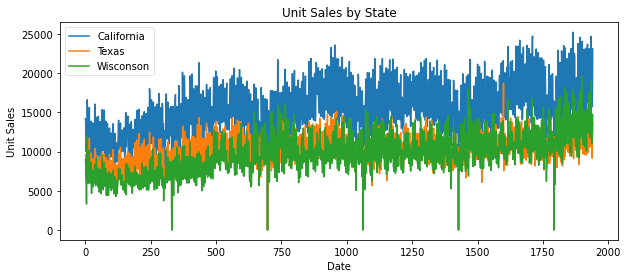

In [44]:
%matplotlib inline
fig = plt.figure(facecolor='w',figsize=(10,4))
ax = fig.add_subplot(111,axisbelow=True)
ax.plot(state_sales[(state_sales['state_id']==0)]['d'], state_sales[(state_sales['state_id']==0)]['demand'], label='California')
ax.plot(state_sales[(state_sales['state_id']==1)]['d'], state_sales[(state_sales['state_id']==1)]['demand'], label='Texas')
ax.plot(state_sales[(state_sales['state_id']==2)]['d'], state_sales[(state_sales['state_id']==2)]['demand'], label='Wisconson')
ax.set_xlabel('Date')
ax.set_ylabel('Unit Sales')
ax.set_title(label = 'Unit Sales by State')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.show()

In [40]:
cat_sales = sales_train_evaluation_processed.groupby(['cat_id','d'])['demand'].sum().reset_index()

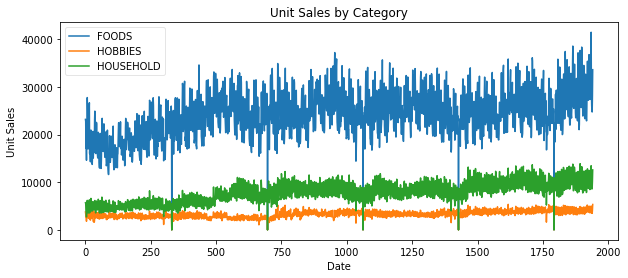

In [43]:
%matplotlib inline
fig = plt.figure(facecolor='w',figsize=(10,4))
ax = fig.add_subplot(111,axisbelow=True)
ax.plot(cat_sales[cat_sales['cat_id']==0]['d'], cat_sales[cat_sales['cat_id']==0]['demand'], label='FOODS')
ax.plot(cat_sales[cat_sales['cat_id']==1]['d'], cat_sales[cat_sales['cat_id']==1]['demand'], label='HOBBIES')
ax.plot(cat_sales[cat_sales['cat_id']==2]['d'], cat_sales[cat_sales['cat_id']==2]['demand'], label='HOUSEHOLD')
ax.set_xlabel('Date')
ax.set_ylabel('Unit Sales')
ax.set_title(label = 'Unit Sales by Category')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.show()